In [31]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv(r'C:\Users\91933\Desktop\FraudDetection\data\Dataset.csv')

# Rename target column if needed
df = df.rename(columns={'fraud': 'is_fraud'})

# Check for nulls (optional)
print("Missing values:\n", df.isnull().sum())

# Drop 'step' column (not relevant for prediction)
df = df.drop(columns=['step'])

# Encode all categorical/object columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, r'C:\Users\91933\Desktop\FraudDetection\model\fraud_model.pkl')
joblib.dump(label_encoders, r'C:\Users\91933\Desktop\FraudDetection\model\label_encoders.pkl')

print("Model and encoders saved successfully.")


Missing values:
 step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
is_fraud       0
dtype: int64


c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.87      0.75      0.81      1298

    accuracy                           1.00    107036
   macro avg       0.93      0.87      0.90    107036
weighted avg       1.00      1.00      1.00    107036

Model and encoders saved successfully.


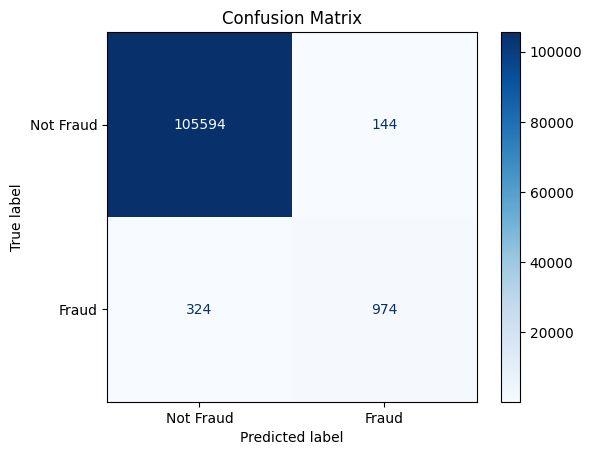

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier


In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv(r'C:\Users\91933\Desktop\FraudDetection\data\Dataset.csv')
df = df.rename(columns={'fraud': 'is_fraud'})

# Drop 'step' column
df = df.drop(columns=['step'])

# Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature-target split
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model and encoders
joblib.dump(model, r'C:\Users\91933\Desktop\FraudDetection\model\fraud_model.pkl')
joblib.dump(label_encoders, r'C:\Users\91933\Desktop\FraudDetection\model\label_encoders.pkl')

print("Model and encoders saved successfully.")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105738
           1       0.88      0.75      0.81      1298

    accuracy                           1.00    107036
   macro avg       0.94      0.87      0.90    107036
weighted avg       1.00      1.00      1.00    107036

Model and encoders saved successfully.


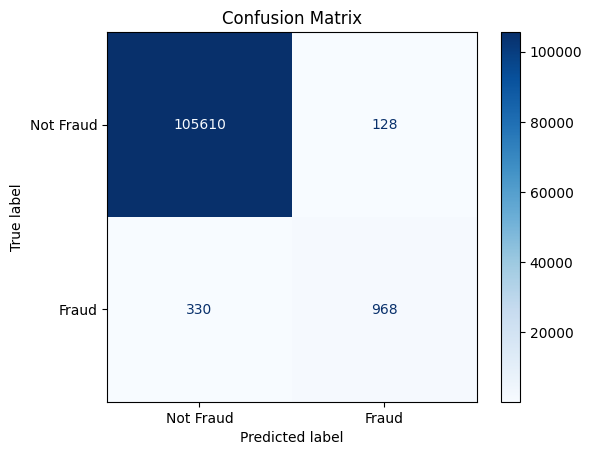

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


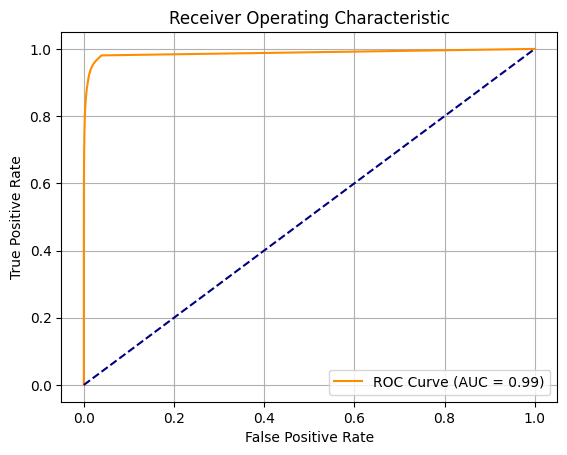

In [28]:
from sklearn.metrics import roc_curve, auc

# Get probability predictions
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


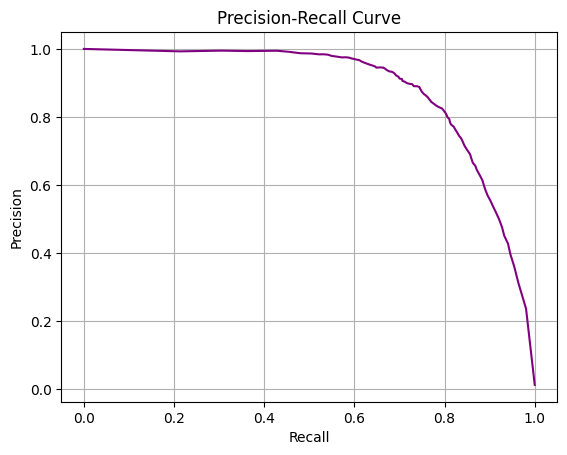

In [29]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


In [36]:
X = df[['amount']]
y = df['is_fraud']

In [38]:
X = df[['gender']]
y = df['is_fraud']


In [39]:
X = df[['age']]
y = df['is_fraud']


In [41]:
X = df[['category']]
y = df['is_fraud']


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    105723
           1       0.84      0.15      0.25      1313

    accuracy                           0.99    107036
   macro avg       0.91      0.57      0.62    107036
weighted avg       0.99      0.99      0.99    107036



In [44]:
columns = ['amount', 'age', 'gender', 'category']
for col in columns:
    print(f"\n Testing with only: {col}")
    X = df[[col]]
    
    # Encode if needed
    if X[col].dtype == 'object':
        X = pd.get_dummies(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))



 Testing with only: amount
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    105723
           1       0.68      0.56      0.62      1313

    accuracy                           0.99    107036
   macro avg       0.84      0.78      0.81    107036
weighted avg       0.99      0.99      0.99    107036


 Testing with only: age


c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    105723
           1       0.00      0.00      0.00      1313

    accuracy                           0.99    107036
   macro avg       0.49      0.50      0.50    107036
weighted avg       0.98      0.99      0.98    107036


 Testing with only: gender


c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    105723
           1       0.00      0.00      0.00      1313

    accuracy                           0.99    107036
   macro avg       0.49      0.50      0.50    107036
weighted avg       0.98      0.99      0.98    107036


 Testing with only: category
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    105723
           1       0.84      0.15      0.25      1313

    accuracy                           0.99    107036
   macro avg       0.91      0.57      0.62    107036
weighted avg       0.99      0.99      0.99    107036



In [45]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [46]:
model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [47]:
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('rf', model2),
        ('xgb', model3)
    ],
    voting='soft'  # or 'hard'
)


In [48]:
ensemble_model.fit(X_train, y_train)


c:\Users\91933\Desktop\FraudDetection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = ensemble_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    105723
           1       0.84      0.15      0.25      1313

    accuracy                           0.99    107036
   macro avg       0.91      0.57      0.62    107036
weighted avg       0.99      0.99      0.99    107036

[[105686     37]
 [  1121    192]]
